In [1]:
import pandas as pd
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/merged.csv')
df.head()

,Hour,Day,Month,CrashCount,Precipitation,Snow_Dummy,Precipitation_Dummy
0,0,1,1,14,0.060714,0,1
1,0,1,2,13,0.019231,1,1
2,0,1,3,19,0.247368,1,1
3,0,1,4,19,0.015789,0,1
4,0,1,5,11,0.085455,0,1


                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     18.74
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           4.08e-12
Time:                        00:12:03   Log-Likelihood:                -27942.
No. Observations:                8756   AIC:                         5.589e+04
Df Residuals:                    8752   BIC:                         5.592e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0229      0.176     62.665

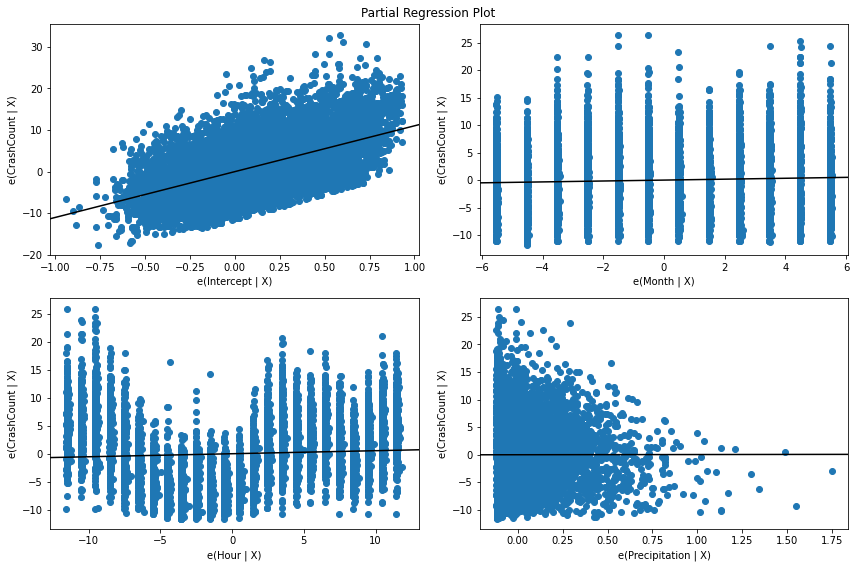

In [3]:
ols_model1 = smf.ols(formula='CrashCount ~ Month + Hour + Precipitation', data=df).fit() 
print(ols_model1.summary())
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(ols_model1, fig=fig)
plt.show()

In [4]:
avg_df = df.groupby(['Month','Hour'], as_index= False).agg({'CrashCount':'mean', 'Precipitation': 'mean'})
avg_df.head()

,Month,Hour,CrashCount,Precipitation
0,1,0,16.451613,0.067714
1,1,1,16.290323,0.086894
2,1,2,15.419355,0.095146
3,1,3,12.225806,0.089673
4,1,4,9.064516,0.080308


                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.261
Date:                Fri, 30 Apr 2021   Prob (F-statistic):              0.288
Time:                        00:12:04   Log-Likelihood:                -823.00
No. Observations:                 288   AIC:                             1654.
Df Residuals:                     284   BIC:                             1669.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.7994      0.972     11.113

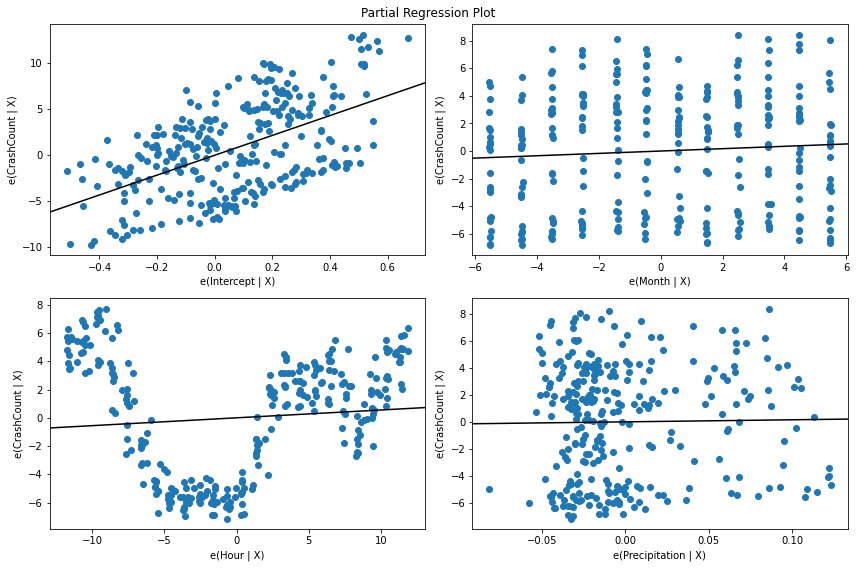

In [5]:
ols_model2 = smf.ols(formula='CrashCount ~ Month + Hour + Precipitation', data=avg_df).fit() 
print(ols_model2.summary())
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(ols_model2, fig=fig)
plt.show()